#### [ 산점도 - 버블 그래프]
- 두 개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [17]:
# [1] 모듈 로딩
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
# [2] 데이터 준비
file_name=r'C:\Users\KDP-17\EX_PANDAS6\data\auto_mpg.csv'

In [19]:
# [3] csv ==> DataFrame 저장
dataDF=pd.read_csv(file_name)

In [20]:
# - 컬럼별 타입 확인
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [21]:
# [4] 연비와 관련이 높은 컬럼(변수) 확인
# -[4-1] 상관계수 확인
corrSR=dataDF.corr(numeric_only=True)['mpg']
round(corrSR['weight'],2)

-0.83

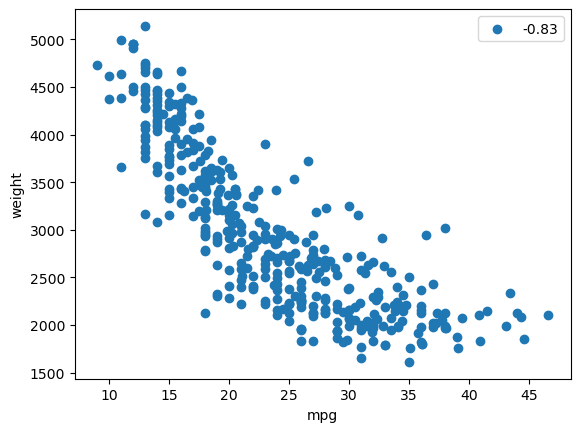

In [22]:
# [4-2] 시각화
plt.scatter(dataDF['mpg'],dataDF['weight'],label=f"{round(corrSR['weight'],2)}")
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

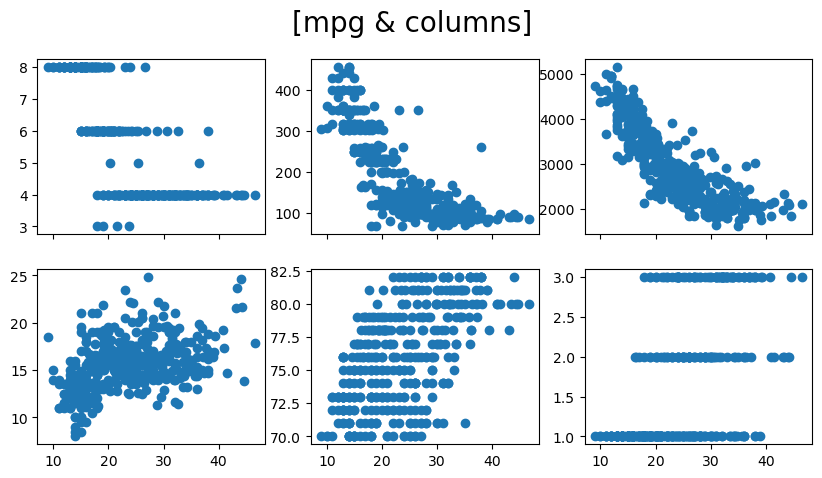

In [23]:
# -[4-3] mpg 컬럼과 다른 컬럼간의 관계 시각화
# 그래프 담을 창 생성
fig=plt.figure(figsize=(10,5))

# 그래프 담을 공간 생성 axs
axs=fig.subplots(2,3,sharex=True)
for row in range(2) :
    for col in range(3) :
        col_name=corrSR.index[row*3+col+1]
        axs[row,col].scatter(dataDF['mpg'],dataDF[col_name])
fig.suptitle('[mpg & columns]',fontsize=20)
plt.show()    

- [5] 연비와 무게, 실린더 수의 관계 시각화
    * 연비와 무게 반비례 관계, 상관관계가 높음
    * 연비와 실린더 개수도 반비례

In [24]:
dataDF['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

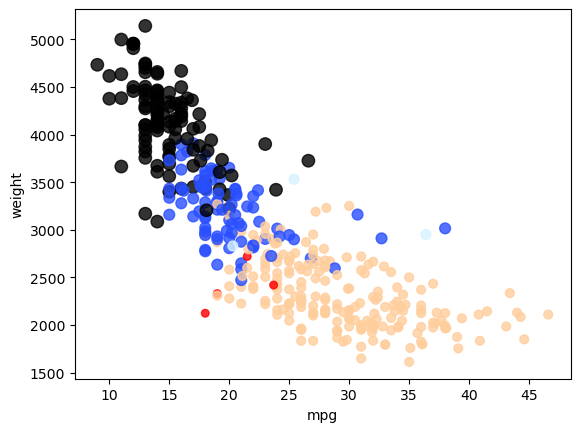

In [35]:
# - mpg와 weight 관계 산점도(scatter) 시각화
color='red','blue','green','yellow','black'
plt.scatter(dataDF['mpg'],dataDF['weight'],s=dataDF['cylinders']*10,
            c=dataDF['cylinders'],cmap='flag',
            alpha=0.8)
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()
# scatter 내 alpha: 투명도, cmap: 